### Note 
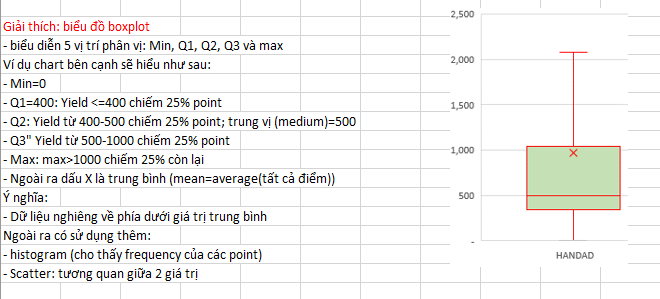

Chuyến bay lý tưởng có mức Yield cao phân bổ nhiều hơn (trung bình nằm dưới điểm trung vị)

### Tổng quan nhận định và một số đề xuất
- Đặc điểm chung
    + Yield các tháng có xu hướng phân bố ở dưới mức trung bình.
    + Yield tháng 3 có mức trung bình cũng như phân bố ở mức thấp hơn so các tháng khác; Yield<500 chiếm chủ yếu
    + Yield tháng 4 có range thu hẹp lại, mức Yield đã được cải thiện phân bố lên mức cao hơn so các tháng trước đấy, mức Yield từ 500-3000 được cải thiện (và trung vị đã tiến dần đến vị trí trung bình)
- Một số đường cần lưu ý
    + HANDAD có dấu hiệu tốt, phân bổ của Yield cao và LF cao tăng, cải thiện rõ rệt giữa các tháng
    + HANSGN có % LF và Yield cao tốt nhất trong 3 đường nhưng không có sự thay đổi trong cả 4 tháng  => Có khả năng chuyển dịch Yield cao và LF giữ nguyên như hiện tại không ???
    + Các đường du lịch: Cần chú ý SGNUIH và SGNHUI chuyến bay có LF và Yield thấp tăng
    + Các đường bay lẻ: SGNTHD chuyến bay có LF và Yield thấp tăng; SGNVII chuyến bay có Yield giảm, LF giữ nguyên tăng
    + Các đường địa phương: cần chú ý SGNVCL và SGNVDH: chuyến bay có LF và Yield thấp tăng


### Chi tiết phân tích

### A. Phân tích Yield theo range 

#### Chuẩn bị dữ liệu
- Nguồn: Số Revera từ hệ thống TCKT
- Doanh thu chỉ gồm fare (không gồm YR, YQ)
- Lọc bỏ các khách FOC, INF, CHD, ID
- Đã tách khách TQ3/4
- Điểm dữ liệu là từng coupon

In [1]:
## Các function cần import
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
## Load data từ ổ mạng
data_files=sorted (glob('//10.1.9.200/cpd/CPD/Not Backup/SLNONG/Project/1.price_range/Model/M*.csv'))
data_files
# gộp data thành 1 table
data=pd.concat(pd.read_csv(datafile).assign(sourcefilename=datafile)
                    for datafile in data_files)
data=data.loc[(data['Yield']>100)&(data['Yield']<10000)]
# 5 dòng đầu tiên
data.head(5)

,Month,Area,Sector2w,Sector,Yield,sourcefilename
0,1,Tourism,SGNDLI,SGNDLI,228.971963,//10.1.9.200/cpd/CPD/Not Backup/SLNONG/Project...
1,1,Tourism,SGNDLI,SGNDLI,228.971963,//10.1.9.200/cpd/CPD/Not Backup/SLNONG/Project...
2,1,Tourism,SGNDLI,SGNDLI,228.971963,//10.1.9.200/cpd/CPD/Not Backup/SLNONG/Project...
3,1,Tourism,SGNDLI,SGNDLI,228.971963,//10.1.9.200/cpd/CPD/Not Backup/SLNONG/Project...
4,1,HANDAD,HANDAD,HANDAD,329.470199,//10.1.9.200/cpd/CPD/Not Backup/SLNONG/Project...


#### Nhận định chung
- Yield các tháng có xu hướng phân bố ở dưới mức trung bình.
- Yield tháng 3 có mức trung bình cũng như phân bố ở mức thấp hơn so các tháng khác; Yield<500 chiếm chủ yếu
- Yield tháng 4 có range đã thu hep và trung vị đã tiến dần đến vị trí trung bình => % mức Yield đã được cải thiện phân bố lên mức cao hơn so các tháng trước đấy, mức Yield từ 500-3000 được cải thiện

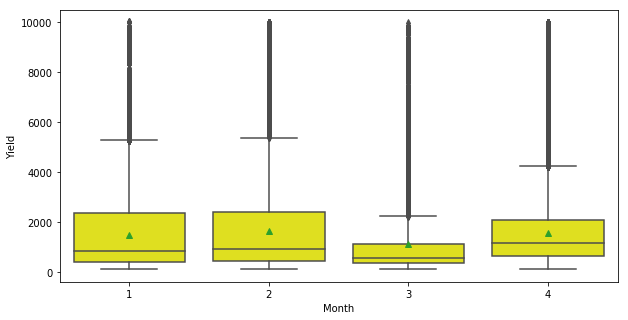

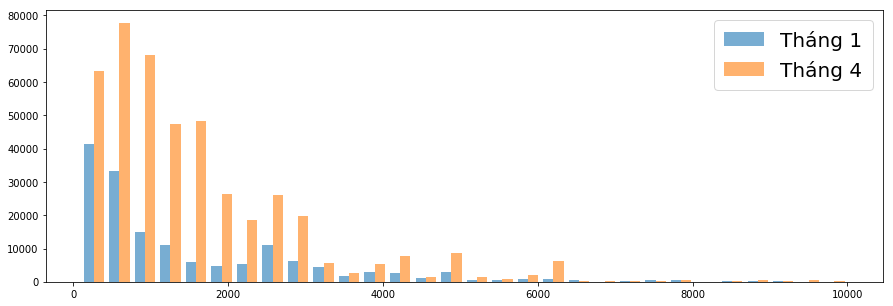

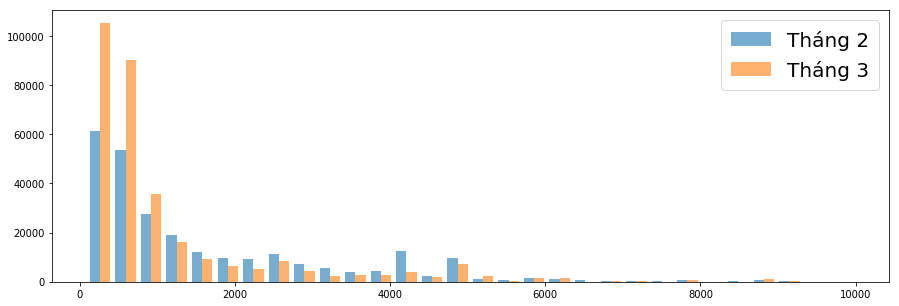

In [2]:
# Yield thay đổi theo tháng 
plt.figure(figsize=(10,5)) ## thay đổi size đồ thị
sns.boxplot(x="Month", y="Yield"
           , data=data.loc[data['Yield']<10000]
           , showmeans=True
           , color= "Yellow")

plt.figure(figsize=(15,5))
x1=data.loc[(data['Month']==1) &(data['Yield']<10000)]
x2=data.loc[(data['Month']==4) &(data['Yield']<10000)]
plt.hist([x1['Yield'],x2['Yield']],label=['Tháng 1','Tháng 4'], bins=30, alpha=0.6, rwidth=0.8)
plt.legend(borderpad=0.5, fontsize=20)
plt.show()
plt.figure(figsize=(15,5))
x1=data.loc[(data['Month']==2) &(data['Yield']<10000)]
x2=data.loc[(data['Month']==3) &(data['Yield']<10000)]
plt.hist([x1['Yield'],x2['Yield']],label=['Tháng 2','Tháng 3'], bins=30, alpha=0.6, rwidth=0.8)
plt.legend(borderpad=0.5, fontsize=20)
plt.show()

### Phân tích 3 đường trục
- 3 đường đều có đặc điểm chung là:
    + mức Yield tập trung ở dưới mức trung bình.
    + Số tháng 4 cải thiện hơn so với các tháng trước (Yield trung vị tiệm cận trung bình)
- Ngoài ra, từng đường có đặc điểm sau:
    + HANSGN: Riêng tháng 3, mức Yield thấp chiếm % lớn, từ tháng 1-4 có sự chuyển dịch Yield tập trung ở mức thấp lên mức cao hơn
    + HANDAD: Range Yield rộng; có sự chuyển dịch lên mức Yield cao hơn. Riêng tháng 4, mực Yield=2700 chiếm % lớn, trong khi khác tháng trước mức Yield chiếm chủ yếu <=500
    + SGNDAD: Giữa các tháng thay đổi không đáng kể

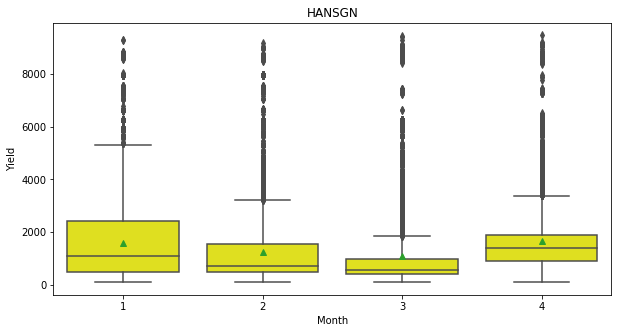

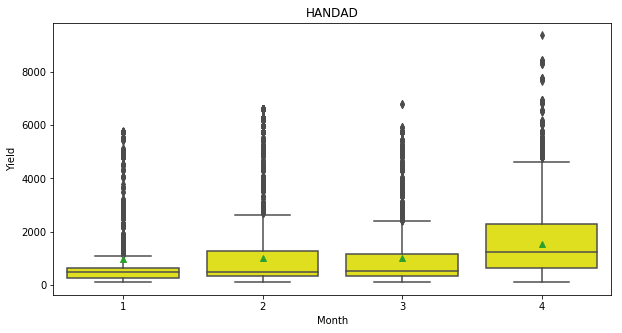

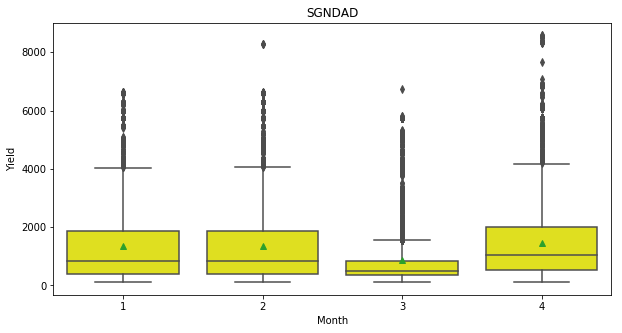

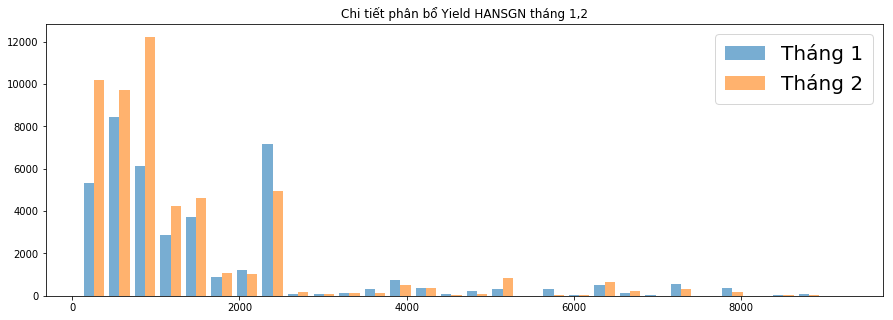

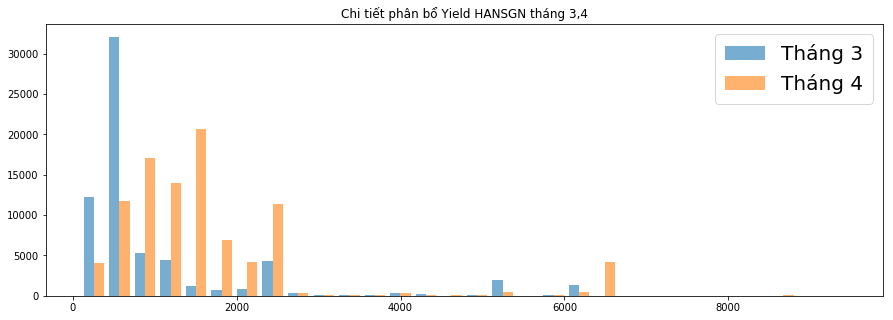

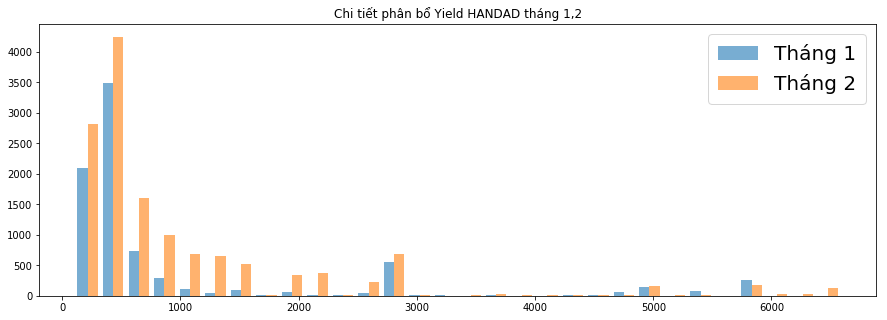

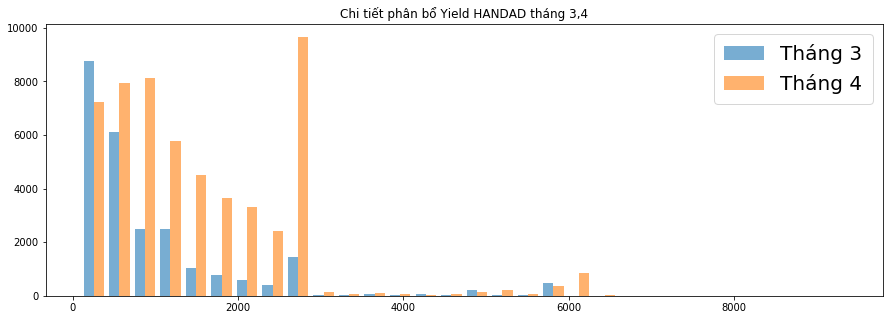

In [4]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Month", y="Yield"
           , data=data.loc[data['Area'].isin(["HANSGN"])]
           , showmeans=True
           , color= "Yellow")
plt.title("HANSGN")
plt.show()
plt.figure(figsize=(10,5))
sns.boxplot(x="Month", y="Yield"
           , data=data.loc[data['Area'].isin(["HANDAD"])]
           , showmeans=True
           , color= "Yellow")
plt.title("HANDAD")
plt.show()
plt.figure(figsize=(10,5))
sns.boxplot(x="Month", y="Yield"
           , data=data.loc[data['Area'].isin(["SGNDAD"])]
           , showmeans=True
           , color= "Yellow")
plt.title("SGNDAD")
plt.show()
plt.figure(figsize=(15,5))
x1=data.loc[(data['Month']==1)&(data['Sector2w']=="HANSGN")]
x2=data.loc[(data['Month']==2)&(data['Sector2w']=="HANSGN")]
plt.hist([x1['Yield'],x2['Yield']],label=['Tháng 1','Tháng 2'], bins=30, alpha=0.6, rwidth=0.8)
plt.legend(borderpad=0.5, fontsize=20)
plt.title("Chi tiết phân bổ Yield HANSGN tháng 1,2")
plt.show()
plt.figure(figsize=(15,5))
x1=data.loc[(data['Month']==3)&(data['Sector2w']=="HANSGN")]
x2=data.loc[(data['Month']==4)&(data['Sector2w']=="HANSGN")]
plt.hist([x1['Yield'],x2['Yield']],label=['Tháng 3','Tháng 4'], bins=30, alpha=0.6, rwidth=0.8)
plt.legend(borderpad=0.5, fontsize=20)
plt.title("Chi tiết phân bổ Yield HANSGN tháng 3,4")
plt.show()

plt.figure(figsize=(15,5))
x1=data.loc[(data['Month']==1)&(data['Sector2w']=="HANDAD")]
x2=data.loc[(data['Month']==2)&(data['Sector2w']=="HANDAD")]
plt.hist([x1['Yield'],x2['Yield']],label=['Tháng 1','Tháng 2'], bins=30, alpha=0.6, rwidth=0.8)
plt.legend(borderpad=0.5, fontsize=20)
plt.title("Chi tiết phân bổ Yield HANDAD tháng 1,2")
plt.show()
plt.figure(figsize=(15,5))
x1=data.loc[(data['Month']==3)&(data['Sector2w']=="HANDAD")]
x2=data.loc[(data['Month']==4)&(data['Sector2w']=="HANDAD")]
plt.hist([x1['Yield'],x2['Yield']],label=['Tháng 3','Tháng 4'], bins=30, alpha=0.6, rwidth=0.8)
plt.legend(borderpad=0.5, fontsize=20)
plt.title("Chi tiết phân bổ Yield HANDAD tháng 3,4")
plt.show()

### Các đường du lịch
    + HAN/SGN-DLI, HANHUI,HAN/SGN-CXR, HANUIH : cải thiện tốt rõ ràng, chuyển dịch phân bố sang Yield mức cao
    + SGNUIH: Tháng 4 Yield cao giảm, chiếm chủ yếu là Yield mức thấp
    + SGNHUI: cần chú ý, tháng 3,4 % Yield =3000 giảm mạnh, trong khi tháng 1,2 mức này chiếm khá lớn
    + Các đường còn lại không có thay đổi giữa các tháng

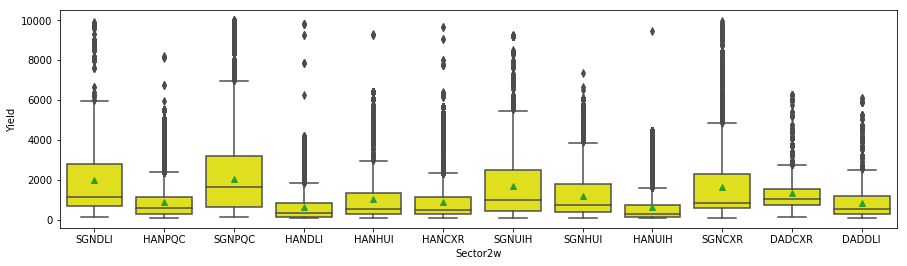

In [50]:
plt.figure(figsize=(15,4))
sns.boxplot(x="Sector2w", y="Yield"
           , data=data.loc[data['Area']=="Tourism"]
           , showmeans=True
           , color= "Yellow")

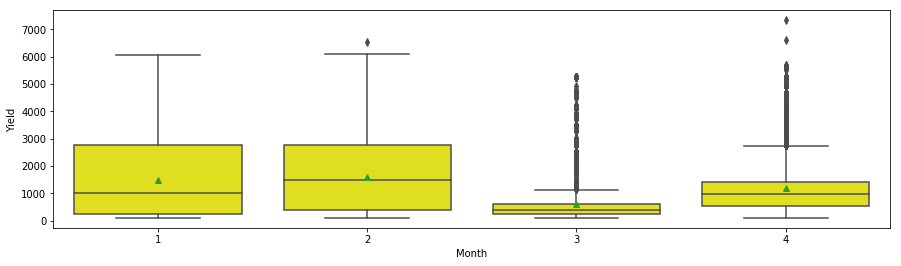

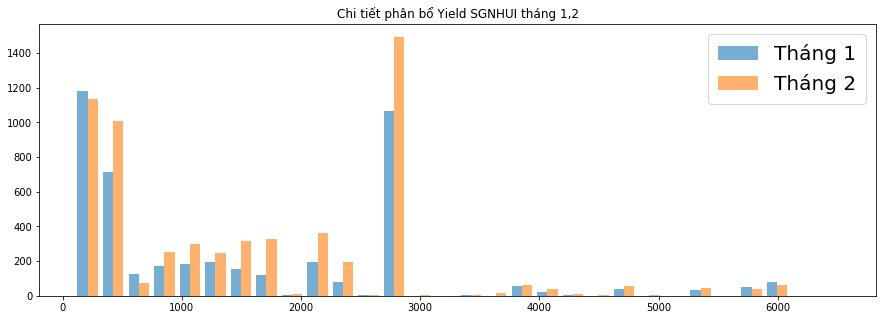

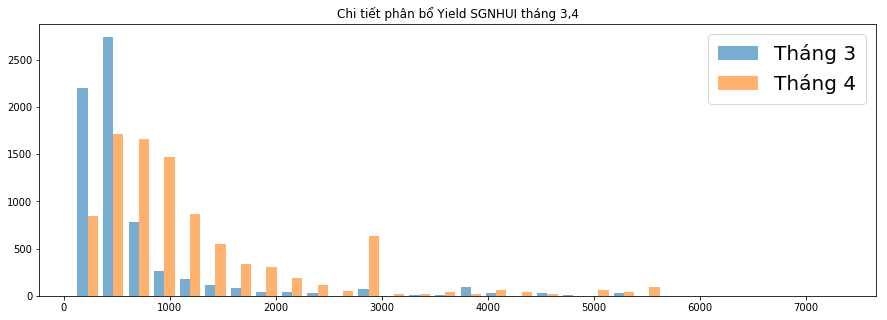

In [5]:
plt.figure(figsize=(15,4))
sns.boxplot(x="Month", y="Yield"
           , data=data.loc[(data['Sector2w']=="SGNHUI")&(data['Yield']<8000)]
           , showmeans=True
           , color= "Yellow")
plt.figure(figsize=(15,5))
x1=data.loc[(data['Month']==1)&(data['Sector2w']=="SGNHUI")]
x2=data.loc[(data['Month']==2)&(data['Sector2w']=="SGNHUI")]
plt.hist([x1['Yield'],x2['Yield']],label=['Tháng 1','Tháng 2'], bins=30, alpha=0.6, rwidth=0.8)
plt.legend(borderpad=0.5, fontsize=20)
plt.title("Chi tiết phân bổ Yield SGNHUI tháng 1,2")
plt.show()
plt.figure(figsize=(15,5))
x1=data.loc[(data['Month']==3)&(data['Sector2w']=="SGNHUI")]
x2=data.loc[(data['Month']==4)&(data['Sector2w']=="SGNHUI")]
plt.hist([x1['Yield'],x2['Yield']],label=['Tháng 3','Tháng 4'], bins=30, alpha=0.6, rwidth=0.8)
plt.legend(borderpad=0.5, fontsize=20)
plt.title("Chi tiết phân bổ Yield SGNHUI tháng 3,4")
plt.show()

### Các đường bay lẻ
- SGNVII, SGNTHD: Tháng 1 Yield tốt, chủ yếu nằm ở mức cao nhưng tháng 3,4 chuyển dịch sang Yield mức thấp (có phải do giai đoạn Tết???)


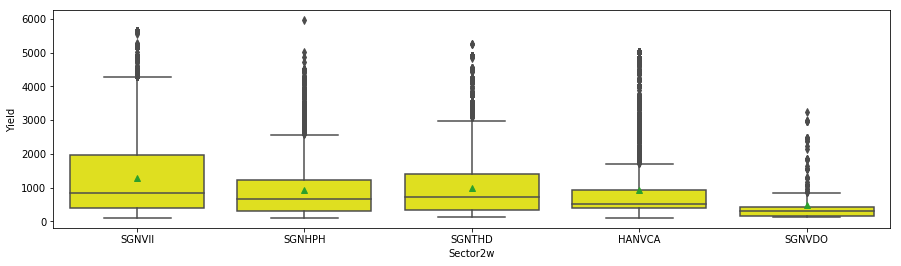

In [77]:
plt.figure(figsize=(15,4))
sns.boxplot(x="Sector2w", y="Yield"
           , data=data.loc[(data['Area']=="Other") & (data['Yield']<6000)]
           , showmeans=True
           , color= "Yellow")

Text(0.5, 1.0, 'SGNTHD')

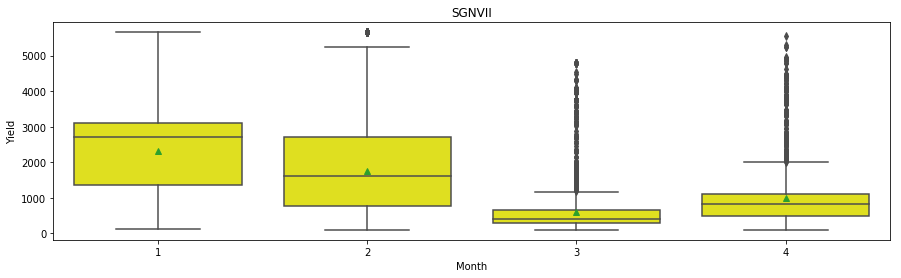

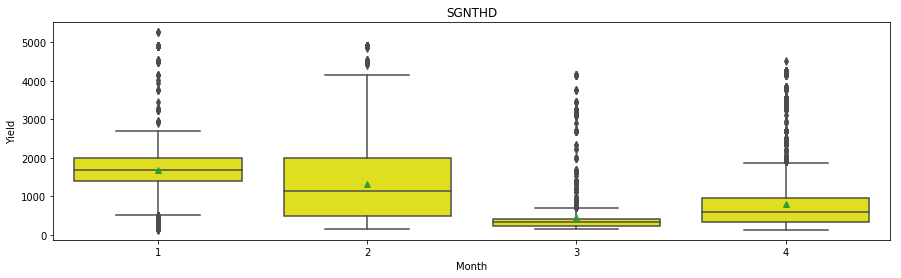

In [6]:
plt.figure(figsize=(15,4))
sns.boxplot(x="Month", y="Yield"
           , data=data.loc[(data['Sector2w']=="SGNVII")&(data['Yield']<6000)]
           , showmeans=True
           , color= "Yellow")
plt.title("SGNVII")
plt.figure(figsize=(15,4))
sns.boxplot(x="Month", y="Yield"
           , data=data.loc[(data['Sector2w']=="SGNTHD")&(data['Yield']<6000)]
           , showmeans=True
           , color= "Yellow")
plt.title("SGNTHD")

### Các đường địa phương
- SGNVCL, SGNVDH: khách tăng thừ tháng 1,2 lên 3,4, có khả năng khách Yield cao chuyển dịch sang khách Yield thấp
- HANBMV, HANVDH, HANPXU: cải thiện

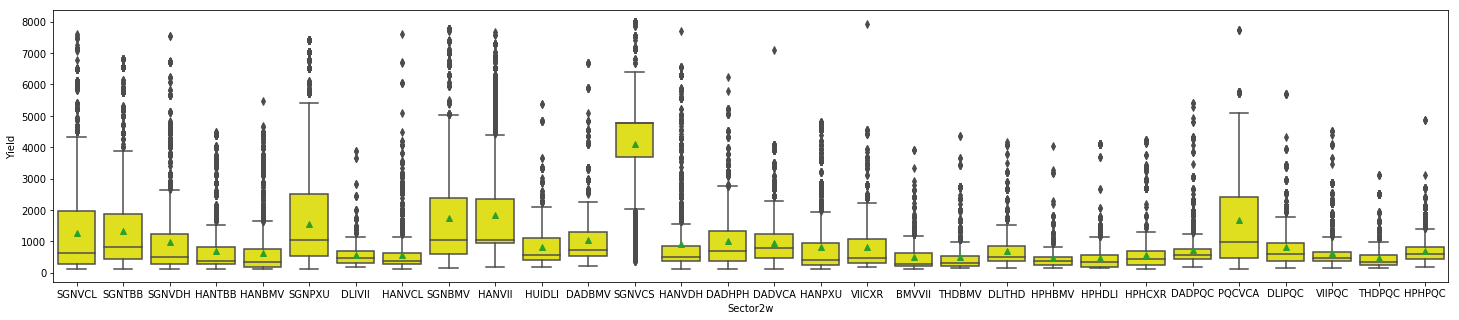

In [94]:
plt.figure(figsize=(25,5))
sns.boxplot(x="Sector2w", y="Yield"
           , data=data.loc[(data['Area']=="Zother") & (data['Yield']<8000)]
           , showmeans=True
           , color= "Yellow")

Text(0.5, 1.0, 'SGNVDH')

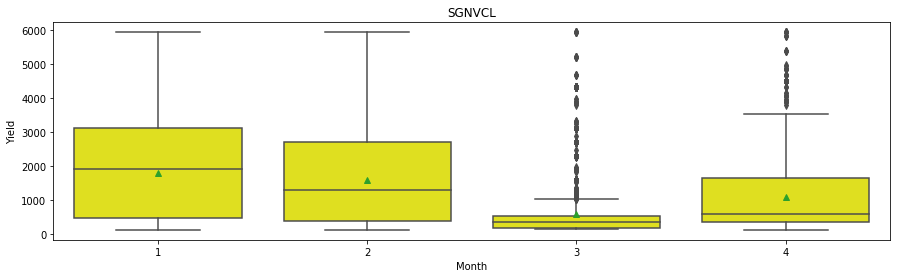

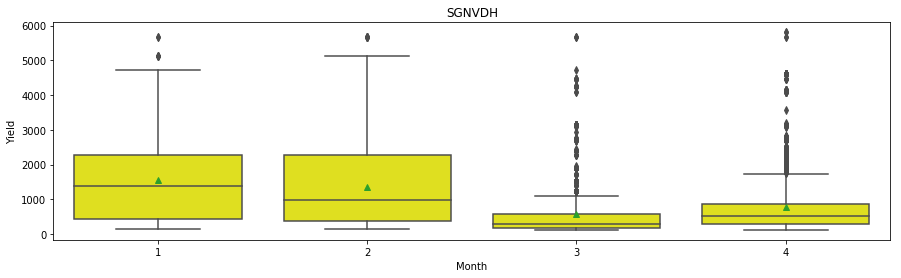

In [7]:
plt.figure(figsize=(15,4))
sns.boxplot(x="Month", y="Yield"
           , data=data.loc[(data['Sector2w']=="SGNVCL")&(data['Yield']<6000)]
           , showmeans=True
           , color= "Yellow")
plt.title("SGNVCL")
plt.figure(figsize=(15,4))
sns.boxplot(x="Month", y="Yield"
           , data=data.loc[(data['Sector2w']=="SGNVDH")&(data['Yield']<6000)]
           , showmeans=True
           , color= "Yellow")
plt.title("SGNVDH")

### B. Phân tích tương quan LF và Yield

#### Đặc điểm dữ liệu
- Dữ liệu theo từng chuyến bay, từng ngày, sector
- Gồm cả khách TQ3/4 và 6 (nếu tách LF thấp)

In [8]:
LF=pd.read_excel(r"\\10.1.9.200\cpd\CPD\Not Backup\SLNONG\Project\1.price_range\LF.xlsx")
LF.head(5)

,FLT_DATE,FLIGHT_NO,Area,Country,Sector 2W,Month,LF,Yield_fls
0,2022-01-01,116,SGNDAD,VN,SGNDAD,1,0.820652,1041.892489
1,2022-01-01,117,SGNDAD,VN,SGNDAD,1,0.483696,927.274553
2,2022-01-01,128,SGNDAD,VN,SGNDAD,1,0.546798,735.259450
3,2022-01-01,129,SGNDAD,VN,SGNDAD,1,0.472906,751.730343
4,2022-01-01,133,SGNDAD,VN,SGNDAD,1,0.228261,1111.086893


### Nhận định
- Các đường bay trục: cải thiện cả LF, Yield cao. Mặc dù HANSGN có mức thay đổi trong 4 tháng không nhiều nhưng độ phân bổ LF, Yield cao của HANSGN tốt nhất trong 3 đường
- Các đường bay du lịch
    + HANDLI, HANHUI, SGNCXR: cải thiện
    + HANPQC, HANCXR, SGNHUI: có dấu hiệu Yield giảm và LF giữ nguyên
    + SGNUIH: có dấu hiệu giảm cả LF và Yield
- Các đường lẻ
    + SGNHPH: cải thiện
    + SGNVII: có dấu hiệu Yield giảm và LF giữ nguyên
    + SGNTHD: Có dấu hiệu giảm cả LF và Yield
- Các đường địa phương:
    + SGNVCL, SGNVDH: Có dấu hiệu giảm cả LF và Yield
- Các đường còn lại không đáng kể


Text(0.5, 0.98, 'HANSGN')

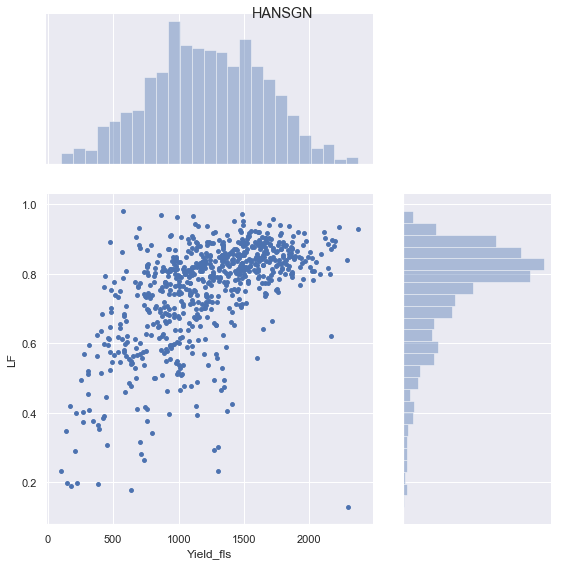

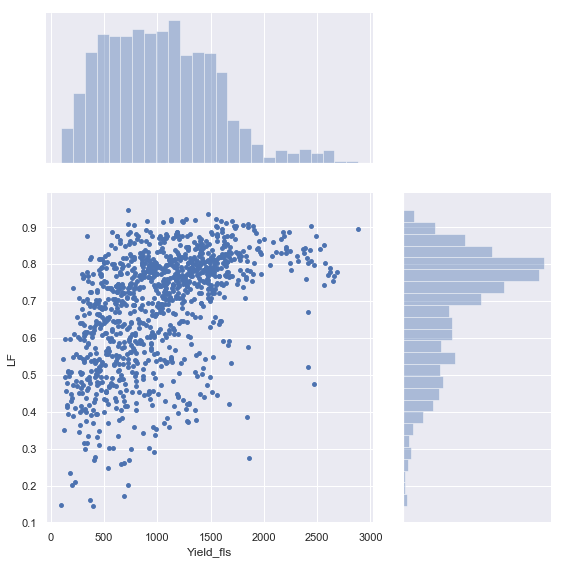

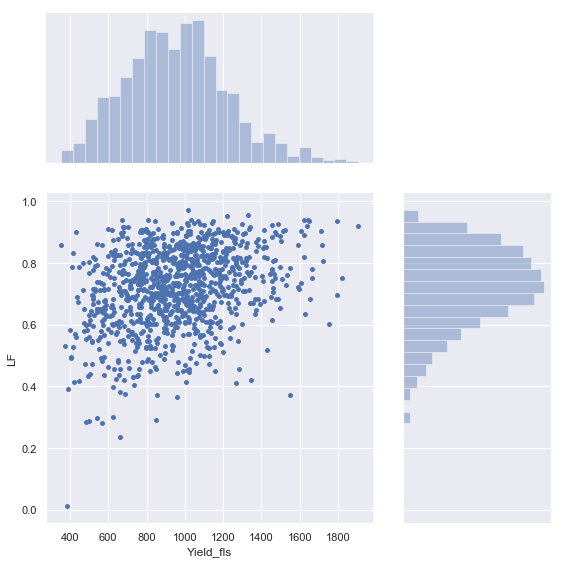

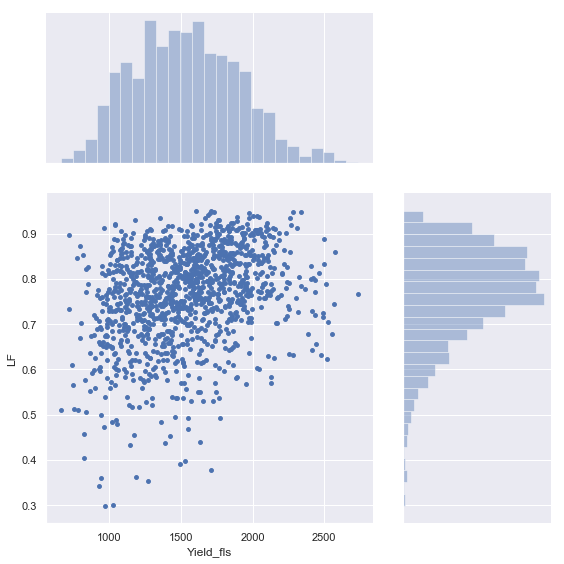

In [13]:
sns.set(rc={'figure.figsize':(8,8)})
p=sns.jointplot(data=LF.loc[(LF['Area']=="HANSGN")&(LF['Month']==1)],x="Yield_fls",y="LF", marginal_kws=dict(bins=25),s=15,height=8, ratio=2)
sns.set(rc={'figure.figsize':(8,8)})
sns.jointplot(data=LF.loc[(LF['Area']=="HANSGN")&(LF['Month']==2)],x="Yield_fls",y="LF", marginal_kws=dict(bins=25),s=15,height=8, ratio=2)
sns.set(rc={'figure.figsize':(8,8)})
sns.jointplot(data=LF.loc[(LF['Area']=="HANSGN")&(LF['Month']==3)],x="Yield_fls",y="LF", marginal_kws=dict(bins=25),s=15,height=8, ratio=2)
sns.set(rc={'figure.figsize':(8,8)})
sns.jointplot(data=LF.loc[(LF['Area']=="HANSGN")&(LF['Month']==4)],x="Yield_fls",y="LF", marginal_kws=dict(bins=25),s=15,height=8, ratio=2)
p.fig.suptitle("HANSGN")

Text(0.5, 0.98, 'SGNUIH')

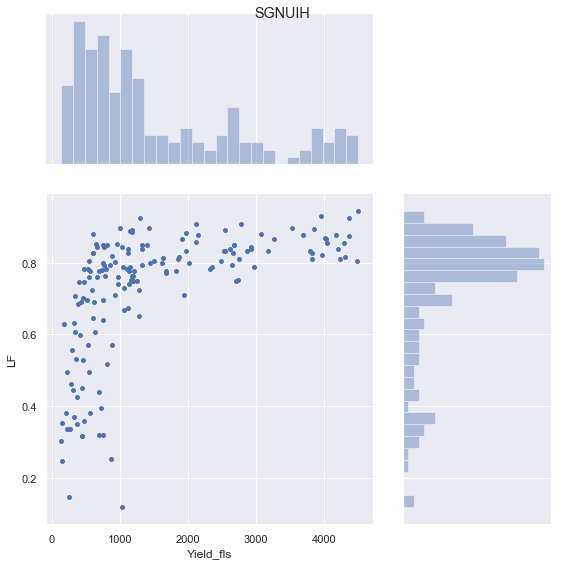

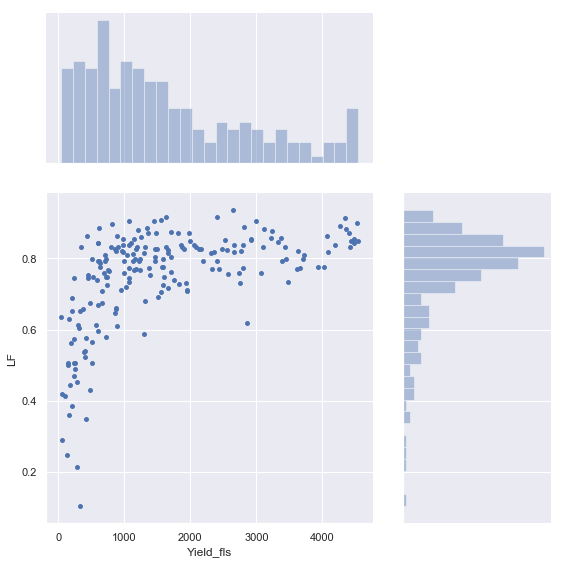

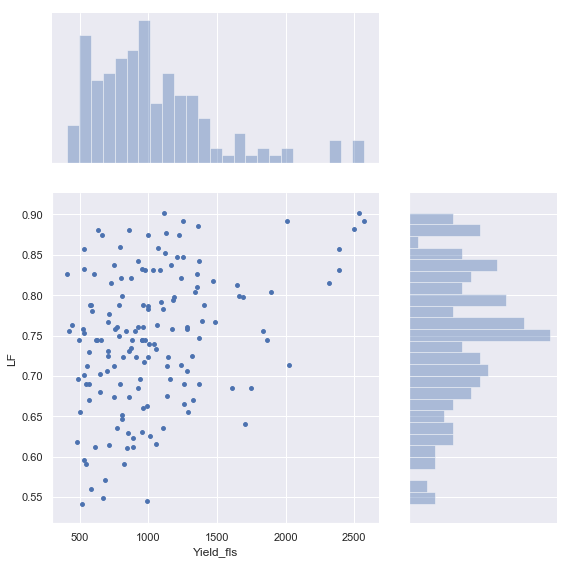

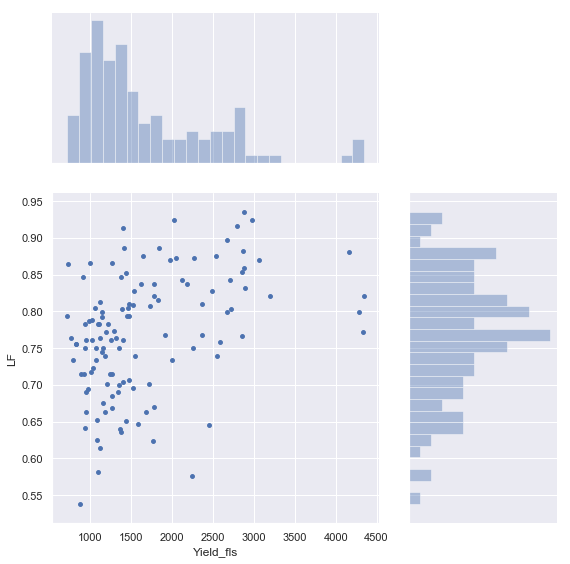

In [14]:
sns.set(rc={'figure.figsize':(8,8)})
p=sns.jointplot(data=LF.loc[(LF['Sector 2W']=="SGNUIH")&(LF['Month']==1)],x="Yield_fls",y="LF", marginal_kws=dict(bins=25),s=15,height=8, ratio=2)
sns.set(rc={'figure.figsize':(8,8)})
sns.jointplot(data=LF.loc[(LF['Sector 2W']=="SGNUIH")&(LF['Month']==2)],x="Yield_fls",y="LF", marginal_kws=dict(bins=25),s=15,height=8, ratio=2)
sns.set(rc={'figure.figsize':(8,8)})
sns.jointplot(data=LF.loc[(LF['Sector 2W']=="SGNUIH")&(LF['Month']==3)],x="Yield_fls",y="LF", marginal_kws=dict(bins=25),s=15,height=8, ratio=2)
sns.set(rc={'figure.figsize':(8,8)})
sns.jointplot(data=LF.loc[(LF['Sector 2W']=="SGNUIH")&(LF['Month']==4)],x="Yield_fls",y="LF", marginal_kws=dict(bins=25),s=15,height=8, ratio=2)
p.fig.suptitle("SGNUIH")

Text(0.5, 0.98, 'SGNTHD')

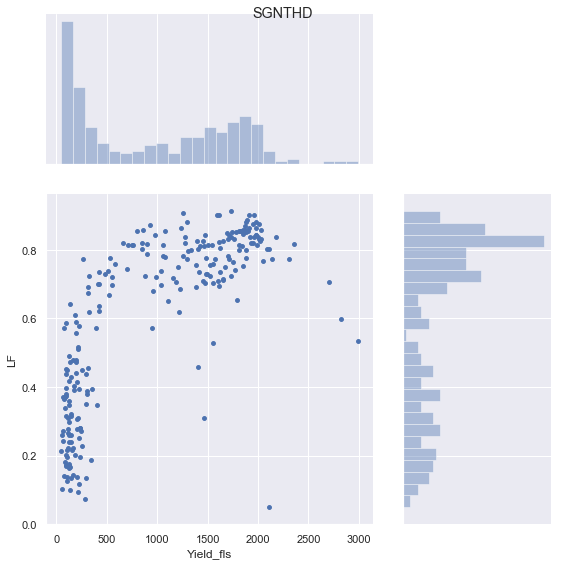

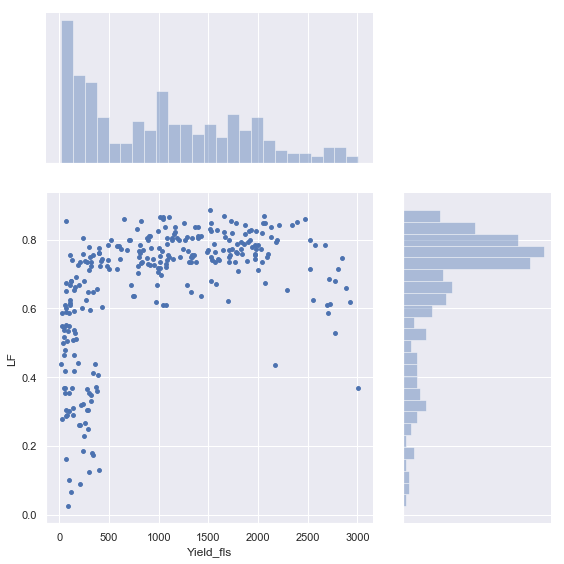

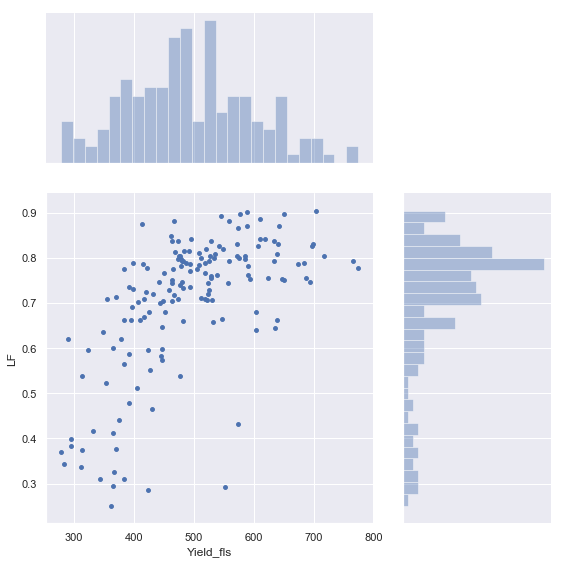

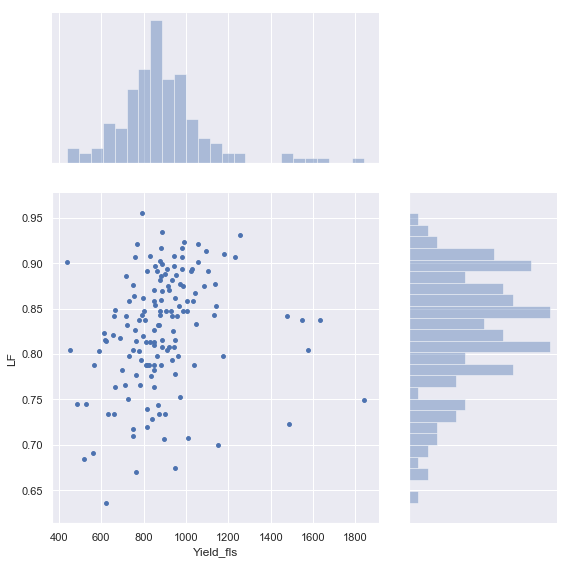

In [15]:
sns.set(rc={'figure.figsize':(8,8)})
p=sns.jointplot(data=LF.loc[(LF['Sector 2W']=="SGNTHD")&(LF['Month']==1)],x="Yield_fls",y="LF", marginal_kws=dict(bins=25),s=15,height=8, ratio=2)
sns.set(rc={'figure.figsize':(8,8)})
sns.jointplot(data=LF.loc[(LF['Sector 2W']=="SGNTHD")&(LF['Month']==2)],x="Yield_fls",y="LF", marginal_kws=dict(bins=25),s=15,height=8, ratio=2)
sns.set(rc={'figure.figsize':(8,8)})
sns.jointplot(data=LF.loc[(LF['Sector 2W']=="SGNTHD")&(LF['Month']==3)],x="Yield_fls",y="LF", marginal_kws=dict(bins=25),s=15,height=8, ratio=2)
sns.set(rc={'figure.figsize':(8,8)})
sns.jointplot(data=LF.loc[(LF['Sector 2W']=="SGNTHD")&(LF['Month']==4)],x="Yield_fls",y="LF", marginal_kws=dict(bins=25),s=15,height=8, ratio=2)
p.fig.suptitle("SGNTHD")

Text(0.5, 0.98, 'SGNVCL')

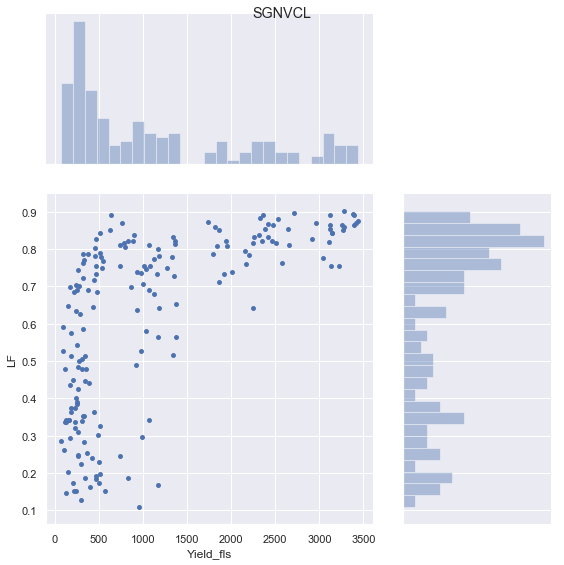

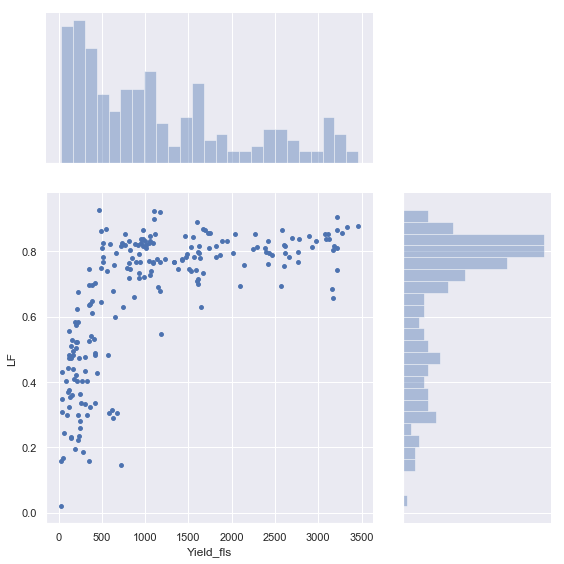

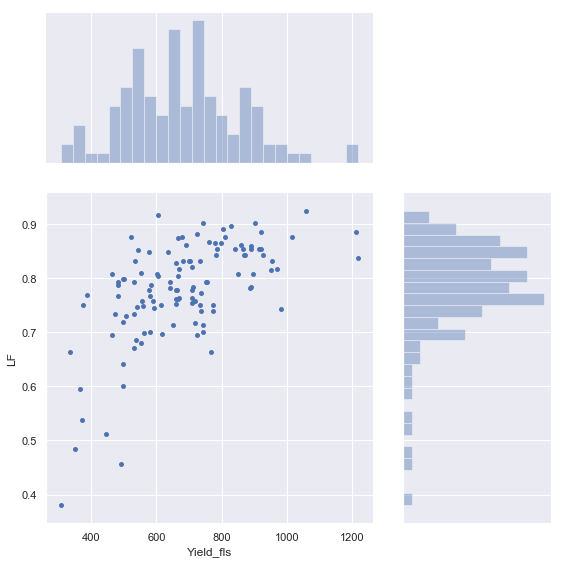

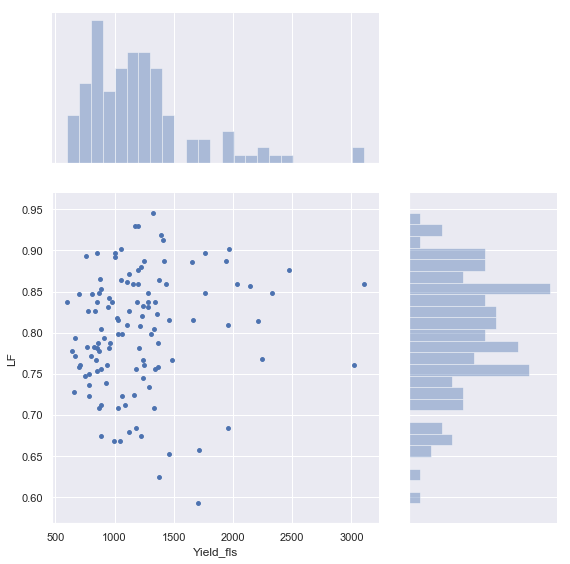

In [16]:
sns.set(rc={'figure.figsize':(8,8)})
p=sns.jointplot(data=LF.loc[(LF['Sector 2W']=="SGNVCL")&(LF['Month']==1)],x="Yield_fls",y="LF", marginal_kws=dict(bins=25),s=15,height=8, ratio=2)
sns.set(rc={'figure.figsize':(8,8)})
sns.jointplot(data=LF.loc[(LF['Sector 2W']=="SGNVCL")&(LF['Month']==2)],x="Yield_fls",y="LF", marginal_kws=dict(bins=25),s=15,height=8, ratio=2)
sns.set(rc={'figure.figsize':(8,8)})
sns.jointplot(data=LF.loc[(LF['Sector 2W']=="SGNVCL")&(LF['Month']==3)],x="Yield_fls",y="LF", marginal_kws=dict(bins=25),s=15,height=8, ratio=2)
sns.set(rc={'figure.figsize':(8,8)})
sns.jointplot(data=LF.loc[(LF['Sector 2W']=="SGNVCL")&(LF['Month']==4)],x="Yield_fls",y="LF", marginal_kws=dict(bins=25),s=15,height=8, ratio=2)
p.fig.suptitle("SGNVCL")